# MNS - Biological Plausible Deep Learning

In [1]:
!pip install -r requirements.txt --quiet

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
# Import Packages
import os
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import tensorflow as tf

# Import Network Architectures
from DNN import DNN, train_dnn_model, eval_dnn
from CNN import CNN, train_cnn_model

# Import log-helper/learning plot functions
from helpers import *
from logger import get_latest_log_fname, process_logger

In [4]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    print("Torch Device: {}".format(torch.cuda.get_device_name(0)))
else:
    print("Torch Device: Local CPU")
    
# Remove files in log dir
log_dir = os.getcwd() + "/logs"
if not os.path.exists(log_dir):
    os.makedirs(directory)
    print("Created New Log Directory")
else:
    filelist = [ f for f in os.listdir(log_dir) if f.endswith(".bak") ]
    for f in filelist:
        os.remove(os.path.join(mydir, f))
    print("Deleted Old Files in Existing Log Directory")

# Define batchsize for data-loading
batch_size = 100

Torch Device: Local CPU
Deleted Old Files in Existing Log Directory


# CIFAR10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                             train=True, 
                                             transform=transforms.ToTensor(),  
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data', 
                                            train=False, 
                                            transform=transforms.ToTensor())

# Simple Feedforward Neural Net

In [6]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# MNIST dataset
X, X_test, y, y_test = get_data(num_samples=70000)

# Define batchsize for data-loading/Epochs for training
batch_size = 100
num_epochs = 5

# Instantiate the model with layersize and Logging directory
dnn_model = DNN(h_sizes=[784, 500], out_size=10)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dnn_model.parameters(), lr=0.001)

/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


Linear(in_features=784, out_features=500, bias=True)
ReLU()
Linear(in_features=500, out_features=10, bias=True)


In [21]:
model = train_dnn_model(dnn_model, num_epochs,
                        X, y, batch_size,
                        device, optimizer, criterion,
                        model_fname ="models/temp_model_dnn.ckpt",
                        verbose=True, logging=True)

# Get test error
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_test = torch.tensor(X_test).to(device)
with torch.no_grad():
    y_pred = model(X_test).cpu().numpy().argmax(1)
print(accuracy_score(y_test, y_pred))

train | epoch  1 | acc: 0.9901 | loss: 0.0386 | time: 2.96
valid | epoch  1 | acc: 0.9733 | loss: 0.0877 | time: 0.18
--------------------------------------------------
train | epoch  2 | acc: 0.9932 | loss: 0.0282 | time: 3.08
valid | epoch  2 | acc: 0.9740 | loss: 0.0868 | time: 0.18
--------------------------------------------------
train | epoch  3 | acc: 0.9958 | loss: 0.0204 | time: 2.84
valid | epoch  3 | acc: 0.9742 | loss: 0.0891 | time: 0.17
--------------------------------------------------
train | epoch  4 | acc: 0.9976 | loss: 0.0145 | time: 2.90
valid | epoch  4 | acc: 0.9748 | loss: 0.0881 | time: 0.17
--------------------------------------------------
train | epoch  5 | acc: 0.9985 | loss: 0.0107 | time: 2.77
valid | epoch  5 | acc: 0.9743 | loss: 0.0901 | time: 0.17
--------------------------------------------------


/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


0.9781142857142857


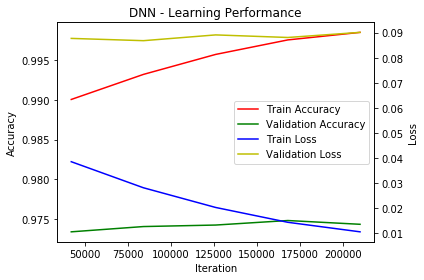

In [23]:
log_fname = get_latest_log_fname(log_dir)
its, train_loss, val_loss, train_acc, val_acc = process_logger(log_fname)
plot_learning(its, train_acc, val_acc, train_loss, val_loss, "DNN - Learning Performance")

In [27]:
eval_dnn()

/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/rtl/anaconda2/envs/mns-project/lib/python2.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


0.9708

# Simple Convolutional Neural Network

In [ ]:
# ConvNet Parameters
ch_sizes = [1, 16, 32]
k_sizes = [5, 5]
stride = 1
padding = 2
out_size = 10
num_epochs = 5
learning_rate = 0.001

# Instantiate the model with layersizes, Loss fct, optimizer
cnn_model = CNN(ch_sizes, k_sizes,
                stride, padding, out_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)

In [ ]:
train_cnn_model(cnn_model, num_epochs,
                train_loader, test_loader,
                device, optimizer, criterion,
                model_fname ="models/temp_model_cnn.ckpt",
                verbose=True, logging=True)

## Guergiev et al (2017)